# Section 1.2 — Data in practice

This notebook contains the code examples from Section 1.2 in the **No Bullshit Guide to Statistics**.

In [1]:
2 + 3

5

## Data management with Pandas

First let's make sure pandas is installed using the `%pip` Jupyter command.

In [2]:
# %pip install pandas

We then import the `pandas` library as the alias `pd`.

In [3]:
import pandas as pd

### Loading the dataset `minimal.csv`

In [4]:
# !cat "../datasets/minimal.csv"

In [5]:
df = pd.read_csv("../datasets/minimal.csv")
df

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


### Other ways to create dataframes
There are other ways to create a `pd.DataFrame` from Python data containers like dicts and lists.

Creating a data frame from a dictionary of columns:

In [6]:
dict_of_columns = {
    "x": [1.0, 1.5, 2.0, 2.5, 3.0],
    "y": [2.0, 1.0, 1.5, 2.0, 1.5],
    "team": ["a", "a", "a", "b", "b"],
    "level": [3, 2, 1, 3, 3],
}

df2 = pd.DataFrame(dict_of_columns)
df2

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [7]:
# df2 is identical to df loaded from minimal.csv
(df2 == df).all().all()

True

Creating a data frame from a list of records (lists or tuples):

In [8]:
list_records = [
    [1.0, 2.0, "a", 3],
    [1.5, 1.0, "a", 2],
    [2.0, 1.5, "a", 1],
    [2.5, 2.0, "b", 3],
    [3.0, 1.5, "b", 3],
]
columns = ["x", "y", "team", "level"]

df3 = pd.DataFrame(list_records, columns=columns)
df3

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [9]:
# df3 is identical to df loaded from minimal.csv
(df3 == df).all().all()

True

Creating a data frame from a list of `dict`s:

In [10]:
dict_records = [
    dict(x=1.0, y=2.0, team="a", level=3),
    dict(x=1.5, y=1.0, team="a", level=2),
    dict(x=2.0, y=1.5, team="a", level=1),
    dict(x=2.5, y=2.0, team="b", level=3),
    dict(x=3.0, y=1.5, team="b", level=3),
]
df4 = pd.DataFrame(dict_records)
df4

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [11]:
# df4 is identical to df loaded from minimal.csv
(df4 == df).all().all()

True

In [12]:
# Note dict(key="val") is just an alternative syntax for {"key":"val"}
dict(x=1.0, y=2.0, group="a", level=3) == {"x":1.0, "y":2.0, "group":"a", "level":3}

True

### Data frame properties

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [15]:
df.columns

Index(['x', 'y', 'team', 'level'], dtype='object')

In [16]:
df.shape

(5, 4)

In [17]:
df.dtypes

x        float64
y        float64
team      object
level      int64
dtype: object

In [18]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5 non-null      float64
 1   y       5 non-null      float64
 2   team    5 non-null      object 
 3   level   5 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 538.0 bytes


In [19]:
# df.axes
# df.memory_usage()
# df.values

### Series

In [20]:
s = pd.Series([3, 5, 7, 9])
s

0    3
1    5
2    7
3    9
dtype: int64

In [21]:
# # ALT. a series of floats
# s2 = pd.Series([0.3, 1.5, 2.2])
# s2

In [22]:
# # ALT. a series of categorical variables
# s3 = pd.Series(["a", "b", "b", "c"])
# s3

In [23]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [24]:
s.values

array([3, 5, 7, 9])

In [25]:
type(s.values)

numpy.ndarray

In [26]:
s[0]

3

In [27]:
s[0:3]

0    3
1    5
2    7
dtype: int64

In [28]:
s.values[0:3]

array([3, 5, 7])

Performing arithmetic operations on the series.

In [29]:
s.sum()

24

In [30]:
s / s.sum() * 100

0    12.500000
1    20.833333
2    29.166667
3    37.500000
dtype: float64

In [31]:
s.mean()

6.0

In [32]:
import numpy as np
np.log(s)

0    1.098612
1    1.609438
2    1.945910
3    2.197225
dtype: float64

### Accessing values in a DataFrame

In [33]:
df.loc[2, "y"]

1.5

#### Entire rows

In [34]:
row2 = df.loc[2,:]
row2

x        2.0
y        1.5
team       a
level      1
Name: 2, dtype: object

In [35]:
# Rows of the dataframe are Series objects
type(row2)

pandas.core.series.Series

In [36]:
row2.index

Index(['x', 'y', 'team', 'level'], dtype='object')

In [37]:
row2.values

array([2.0, 1.5, 'a', 1], dtype=object)

In [38]:
row2["y"]

1.5

#### Entire columns

In [39]:
ys = df["y"]
ys

0    2.0
1    1.0
2    1.5
3    2.0
4    1.5
Name: y, dtype: float64

In [40]:
type(ys)

pandas.core.series.Series

In [41]:
ys.index

RangeIndex(start=0, stop=5, step=1)

In [42]:
ys.values

array([2. , 1. , 1.5, 2. , 1.5])

In [43]:
ys[2]

1.5

In [44]:
print(df[["x", "y"]])

     x    y
0  1.0  2.0
1  1.5  1.0
2  2.0  1.5
3  2.5  2.0
4  3.0  1.5


#### Selecting subsets of rows


In [45]:
df.head(2)
# df.tail(2)
# df.sample(3)

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2


To select only rows where `team` is `b`, we first build the boolean selection mask...

In [46]:
mask = df["team"] == "b"

... then select the rows using the mask.

In [47]:
df[mask]

,x,y,team,level
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The above two step process can be combined into a more compact expression:

In [48]:
df[df["team"]=="b"]

,x,y,team,level
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [49]:
df[(df["team"] == "b") & (df["x"] >= 3)]

,x,y,team,level
4,3.0,1.5,b,3


In [50]:
~(df["team"] == "b")

0     True
1     True
2     True
3    False
4    False
Name: team, dtype: bool

In [51]:
df[(df["team"] == "b") & (df["x"] >= 3)]

,x,y,team,level
4,3.0,1.5,b,3


In [52]:
df["level"].isin([2,3])

0     True
1     True
2    False
3     True
4     True
Name: level, dtype: bool

#### Grouping and aggregation

In [53]:
df.groupby("team")

In [54]:
df.groupby("team")["x"]

In [55]:
df.groupby("team")["x"].mean()

team
a    1.50
b    2.75
Name: x, dtype: float64

In [56]:
df.groupby("team")["x"].aggregate(["sum", "count", "mean"])

,sum,count,mean
team,,,
a,4.5,3,1.50
b,5.5,2,2.75


In [57]:
df.groupby("team")["x"] \
  .agg(["sum", "count", "mean"])

,sum,count,mean
team,,,
a,4.5,3,1.50
b,5.5,2,2.75


In [58]:
(df
  .groupby("team")["x"]
  .agg(["sum", "count", "mean"])
)

,sum,count,mean
team,,,
a,4.5,3,1.50
b,5.5,2,2.75


#### Modifying data frames

The transpose of a matrix corresponds to flipping the rows and the columns.

In [59]:
dfT = df.transpose()
dfT

,0,1,2,3,4
x,1.0,1.5,2.0,2.5,3.0
y,2.0,1.0,1.5,2.0,1.5
team,a,a,a,b,b
level,3,2,1,3,3


In [60]:
# add the columns to the index; result is series with a multi-index
# df.stack()

In [61]:
# ALT. way to do transpose
# df.stack().reorder_levels([1,0]).unstack()

#### Adding new columns

In [122]:
df["xy"] = df["x"] * df["y"]
print(df)

     x    y team  level   xy
0  1.0  2.0    a      3  2.0
1  1.5  1.0    a      2  1.5
2  2.0  1.5    a      1  3.0
3  2.5  2.0    b      3  5.0
4  3.0  1.5    b      3  4.5


In [123]:
# undo the modification
df = df.drop(columns=["xy"])

In [91]:
df2 = df.copy()
df2["xy"] = df["x"] * df["y"]

In [88]:
df2 = df.assign(xy = df["x"] * df["y"])

,x,y,team,level,xy
0,1.0,2.0,a,3,2.0
1,1.5,1.0,a,2,1.5
2,2.0,1.5,a,1,3.0
3,2.5,2.0,b,3,5.0
4,3.0,1.5,b,3,4.5


In [117]:
import numpy as np
df3 = df.assign(xy = df["x"] * df["y"]) \
        .assign(z = 1) \
        .assign(r = np.sqrt(df["x"]**2 + df["y"]**2)) \
        .assign(team = df["team"].str.upper())
print(df3)

     x    y team  level   xy  z         r
0  1.0  2.0    A      3  2.0  1  2.236068
1  1.5  1.0    A      2  1.5  1  1.802776
2  2.0  1.5    A      1  3.0  1  2.500000
3  2.5  2.0    B      3  5.0  1  3.201562
4  3.0  1.5    B      3  4.5  1  3.354102


In [118]:
df

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


#### Dropping parts of a data frame

In [145]:
df.drop([0,2,4])

,x,y,team,level
1,1.5,1.0,a,2
3,2.5,2.0,b,3


In [188]:
df.drop(columns=["level"])

,x,y,team
0,1.0,2.0,a
1,1.5,1.0,a
2,2.0,1.5,a
3,2.5,2.0,b
4,3.0,1.5,b


Other related methods `.dropna()` for removing rows with missing values,
and `.drop_duplicates()` for removing rows that contain duplicate data.

#### Datasets for the book

In [197]:
students = pd.read_csv("../datasets/students.csv")

In [198]:
students.head()

,student_ID,background,curriculum,effort,score
0,1,arts,debate,10.96,75.0
1,2,science,lecture,8.69,75.0
2,3,arts,debate,8.60,67.0
3,4,arts,lecture,7.92,70.3
4,5,science,debate,9.90,76.1


## Extract-Transform-Load operations


#### Dealing with outliers

In [63]:
tmpdf = pd.read_csv("../datasets/raw/minimal.csv")
rawdf = tmpdf.convert_dtypes()
rawdf

,x,y,grp,lvl
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,1.5,1.5,a,<NA>
4,10.0,10.0,a,3
5,2.5,2.0,b,3
6,3.0,1.5,b,3
7,11.0,<NA>,b,2


In [64]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       8 non-null      Float64
 1   y       7 non-null      Float64
 2   grp     8 non-null      string 
 3   lvl     7 non-null      Int64  
dtypes: Float64(2), Int64(1), string(1)
memory usage: 408.0 bytes


In [65]:
rawdf.isna().sum()

x      0
y      1
grp    0
lvl    1
dtype: int64

In [66]:
rawdf.isna().sum(axis=1)

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
dtype: int64

In [67]:
rawdf.dropna()

,x,y,grp,lvl
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
4,10.0,10.0,a,3
5,2.5,2.0,b,3
6,3.0,1.5,b,3


<AxesSubplot:xlabel='x', ylabel='y'>

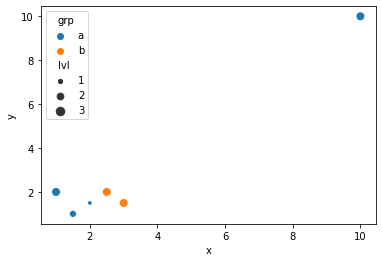

In [68]:
# let's see what the raw data looks like
import seaborn as sns
sns.scatterplot(x="x", y="y", hue="grp", size="lvl", data=rawdf)

In [69]:
df.describe()

,x,y,level,xy
count,5.000000,5.00000,5.000000,5.000000
mean,2.000000,1.60000,2.400000,3.200000
std,0.790569,0.41833,0.894427,1.524795
min,1.000000,1.00000,1.000000,1.500000
25%,1.500000,1.50000,2.000000,2.000000
50%,2.000000,1.50000,3.000000,3.000000
75%,2.500000,2.00000,3.000000,4.500000
max,3.000000,2.00000,3.000000,5.000000


### Load different formats

In [70]:
!cat ../datasets/formats/minimal.tsv

x	y	team	level
1.0	2.0	a	3
1.5	1.0	a	2
2.0	1.5	a	1
2.5	2.0	b	3
3.0	1.5	b	3


In [71]:
pd.read_csv("../datasets/formats/minimal.tsv", sep="\t")

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [72]:
pd.read_json("../datasets/formats/minimal.json")

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [73]:
pd.read_xml("../datasets/formats/minimal.xml")

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [74]:
pd.read_html("../datasets/formats/minimal.html")[0]

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [75]:
pd.read_excel("../datasets/formats/minimal.ods")


,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [76]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///../datasets/formats/minimal.sqlite")
pd.read_sql_table("players", con=engine)

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [77]:
pd.read_sql_query("SELECT x, y, team, level FROM players;", con=engine)

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [78]:
True & False

False

In [79]:
True | False

True

In [80]:
True ^ True

False

In [81]:
x = True
x

True

In [144]:
# Drop rows that fit a certain condition
mask = df["x"] >= 2
mask[mask].index
df.drop(index=mask[mask].index)

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2


In [187]:
df[["x", "y", "team"]]

,x,y,team
0,1.0,2.0,a
1,1.5,1.0,a
2,2.0,1.5,a
3,2.5,2.0,b
4,3.0,1.5,b
